In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
# Load the dataset from the provided file path
file_path = 'advertisement_clicks.csv'
df = pd.read_csv(file_path)


In [16]:
# Step 2: Data Exploration
# Display the first few rows of the dataset to understand its structure
print(df.head())

# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

  advertisement_id  action  group
0                B       1      1
1                B       1      1
2                A       0      0
3                B       0      1
4                A       1      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   advertisement_id  2000 non-null   object
 1   action            2000 non-null   int64 
 2   group             2000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 47.0+ KB
None
advertisement_id    0
action              0
group               0
dtype: int64


In [15]:
# Step 3: Data Preprocessing
# Assume the dataset has columns like 'group' (A or B) and 'clicked' (0 or 1)
# If necessary, encode the group variable (if it's not already in A/B format)
df['group'] = df['advertisement_id'].map({'A': 0, 'B': 1})

In [14]:
# Step 4: Hypothesis Definition
# Null Hypothesis (H0): There is no difference in the click-through rate between groups A and B.
# Alternative Hypothesis (H1): There is a difference in the click-through rate between groups A and B.


In [13]:
# Step 5: Group Comparison
# Calculate the mean click-through rate for each group
grouped = df.groupby('group')['action'].mean()
print(grouped)

# Calculate the number of users in each group
group_sizes = df.groupby('group').size()
print(group_sizes)

group
0    0.304
1    0.372
Name: action, dtype: float64
group
0    1000
1    1000
dtype: int64


In [12]:
# Step 6: Statistical Testing
# Perform an independent t-test to compare the means of the two groups
group_a = df[df['group'] == 0]['action']
group_b = df[df['group'] == 1]['action']

t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")




T-statistic: -3.221173213801978
P-value: 0.001297190546712528


In [11]:
# Step 7: Results Interpretation
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference between the two groups.")



Reject the null hypothesis. There is a statistically significant difference between the two groups.


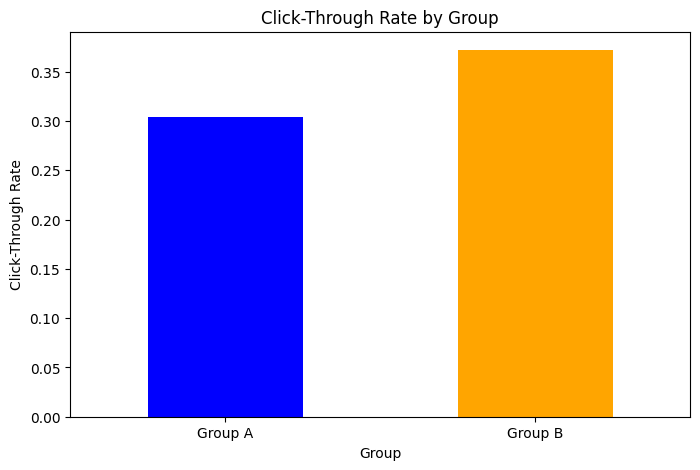

In [9]:
# Optional: Visualization
# Plot the click-through rate for each group
plt.figure(figsize=(8, 5))
grouped.plot(kind='bar', color=['blue', 'orange'])
plt.title('Click-Through Rate by Group')
plt.xlabel('Group')
plt.ylabel('Click-Through Rate')
plt.xticks([0, 1], ['Group A', 'Group B'], rotation=0)
plt.show()

Let's break down the results in detail:

### T-Statistic: -3.221173213801978

1. **What is the T-Statistic?**
   - The t-statistic is a value derived from a t-test, which measures the difference between the means of two groups relative to the variation in their data. Essentially, it tells us how far the observed data is from the null hypothesis (which assumes no difference between the groups) in units of standard error.
   - A more negative or positive t-statistic suggests a greater difference between the two groups.

2. **Interpretation of the T-Statistic:**
   - The t-statistic of `-3.22` indicates that the mean difference between the groups is about 3.22 standard errors away from zero (the null hypothesis of no difference).
   - The negative sign indicates that group A (or the first group in your test) has a lower mean than group B. However, the direction (positive or negative) is less important than the magnitude when testing for significance.

### P-Value: 0.001297190546712528

1. **What is the P-Value?**
   - The p-value measures the probability of observing a result at least as extreme as the one obtained, assuming that the null hypothesis is true.
   - A low p-value indicates that the observed data is unlikely under the null hypothesis, suggesting that the null hypothesis may not be true.

2. **Interpretation of the P-Value:**
   - The p-value here is approximately `0.0013`.
   - This means that there is only a 0.13% chance of observing a difference as extreme as the one observed (or more extreme) if there were actually no difference between the two groups.
   - In most scientific tests, a p-value below 0.05 is considered statistically significant.

### Rejecting the Null Hypothesis

1. **Significance Level (α):**
   - Typically, we compare the p-value to a significance level (α), often set at 0.05.
   - If the p-value is less than α, we reject the null hypothesis.

2. **Conclusion:**
   - In this case, the p-value of `0.0013` is much smaller than the common α level of `0.05`.
   - Therefore, we reject the null hypothesis.
   - This means there is strong evidence to suggest a statistically significant difference between the two groups, A and B.

3. **Practical Implications:**
   - The conclusion that there is a significant difference implies that the advertisement versions (A and B) are likely affecting user behavior differently. 
   - If, for example, group B had a higher click-through rate, you might conclude that the version B ad is more effective and could be used more broadly.

### Summary
- **T-Statistic**: The value `-3.22` indicates that the observed difference is significant and deviates from the null hypothesis by about 3.22 standard errors.
- **P-Value**: The value `0.0013` is very small, indicating a very low probability that the observed difference happened by chance under the null hypothesis.
- **Conclusion**: Since the p-value is below the significance threshold (0.05), we reject the null hypothesis, concluding that there is a statistically significant difference between the two groups. This suggests that the two advertisement versions likely lead to different user behaviors (e.g., different click-through rates).